In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [105]:
df = pd.read_csv("loan_data.csv")
df.isnull().sum().sum()

75

In [106]:
len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [107]:
df.fillna(value=df.mean(), inplace=True)

C:\Users\yusuf\AppData\Local\Temp\ipykernel_15828\4098328409.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(value=df.mean(), inplace=True)


In [108]:
df["Gender"].fillna(value="Unknown", inplace=True)
df["Self_Employed"].fillna(value="Unknown", inplace=True)
df["Married"].fillna(value="Unknown", inplace=True)
df["Dependents"].fillna(value="Unknown", inplace=True)

In [109]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\yusuf\AppData\Local\Temp\ipykernel_15828\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

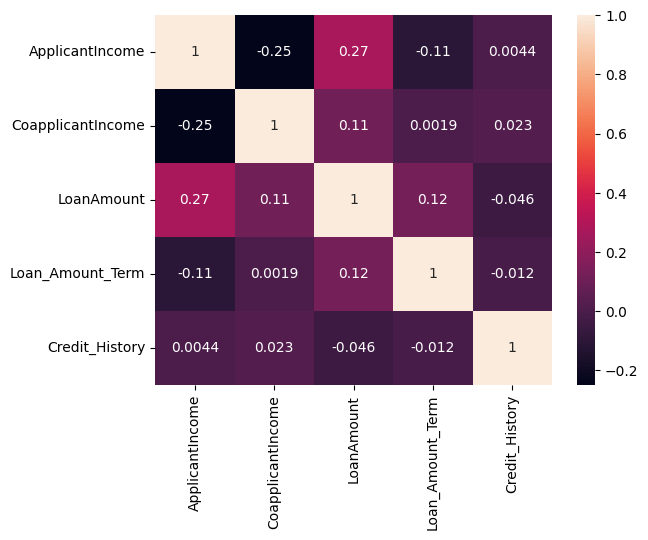

In [110]:
sns.heatmap(df.corr(), annot=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [112]:
numerical_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
object_features = ["Gender", 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']
target = "Loan_Status"

In [113]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02
mean,1.282147e-16,-3.963001e-17,-1.049030e-16,-4.522483e-16,2.424424e-16
std,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00
min,-2.418877e+00,-5.463709e-01,-3.389221e+00,-4.874881e+00,-2.366166e+00
25%,-6.910297e-01,-5.463709e-01,-5.291748e-01,2.836469e-01,4.587464e-01
50%,-1.740860e-01,-1.258801e-01,1.770094e-01,2.836469e-01,4.587464e-01
75%,4.994218e-01,3.159989e-01,7.772660e-01,2.836469e-01,4.587464e-01
max,4.318317e+00,1.392784e+01,1.589378e+00,2.062450e+00,4.587464e-01


In [114]:
df_2 = pd.get_dummies(data=df[object_features], drop_first = True)




In [115]:
new_df = df[numerical_features].join(df_2)

In [116]:
new_df.head()
x = new_df.copy()
y = df[target]
y = pd.get_dummies(y, drop_first=True)
y.value_counts()

Y
1    271
0    110
dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

In [118]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
model_params = {
     
        'ridge': {
            'model': RidgeClassifierCV(),
            'params': {
                'alphas': [1,2],
            }
        },
        "xgbclassifier":
        {
            "model": XGBClassifier(),
            "params": 
            {
                'min_child_weight': [1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6],
        'max_depth': [3, 4]
            }
        },
        "decisionTree":
        {
            "model": DecisionTreeClassifier(),
            "params":
            {
                "criterion": ['gini', 'entropy'],
                "max_depth" : [2,4,6,8,10,12]
            }
        },
        "random_forrest":
        {
            "model": RandomForestClassifier(),
            "params":
            {
                "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)],
                "min_samples_split": [2, 5, 10],
                "bootstrap":  [True, False]
            }
        },
        "svc":
        {
            "model": SVC(),
            "params":
            {
                "kernel": ['poly', 'rbf', 'sigmoid'],
                "C": [50, 10, 1.0, 0.1, 0.01]
            }
        }

    }

In [139]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False, n_iter=50, scoring=recall_score)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_2 = pd.DataFrame(scores,columns=['model','best_score','best_params', "best_recall"])
df_2

C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 


In [ ]:
y_pred = clf.best_estimator_.predict(x_test)


              precision    recall  f1-score   support

           0       0.64      0.57      0.60        28
           1       0.83      0.87      0.85        68

    accuracy                           0.78        96
   macro avg       0.74      0.72      0.73        96
weighted avg       0.78      0.78      0.78        96



<AxesSubplot: >

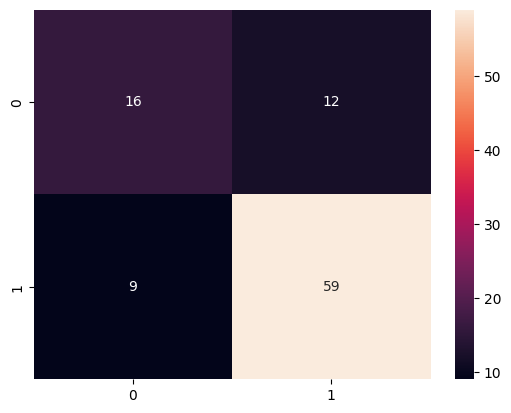

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
y_test.value_counts()
sns.heatmap(confusion_matrix(y_pred=y_pred, y_true=y_test), annot=True)